# HomeWork 1 for GEOG 210A F25

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import seaborn as sns

## Question 1: 
<font color="orange">
Download the daily drifter data and the hourly drifter data from Canvas, and read in the variables to your Python workspace.
</font>

In [17]:
# read file
drifter_daily = pd.read_csv('/Users/houpuli/Downloads/drifter_46926_aug2014_daily.csv')
drifter_hourly = pd.read_csv('/Users/houpuli/Downloads/drifter_46926_aug2014_hourly.csv')

## Question 2: 
<font color="orange">
Part I:   

Plot the position of the drifter (i) at each day and (ii) at each hour. Put these on the same plot, but use different markers/colors for the daily vs. hourly data. Plot longitude on the x-axis, latitude on the y-axis.
</font>

In [18]:
def plot_drifter_positions(drifter_daily, drifter_hourly):
    """
    Plot drifter positions from daily and hourly datasets.
    
    Parameters
    ----------
    drifter_daily : pd.DataFrame
    drifter_hourly : pd.DataFrame
    """

    # Convert datetime
    drifter_daily['Date  and time'] = pd.to_datetime(drifter_daily['Date  and time'])
    drifter_hourly['Date  and timee'] = pd.to_datetime(drifter_hourly['Date  and time'])

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(drifter_hourly['Longitude'], drifter_hourly['Latitude'], '.-', 
             label='Hourly', color='red', alpha=0.5)
    plt.plot(drifter_daily['Longitude'], drifter_daily['Latitude'], 'o-', 
             label='Daily', color='black', alpha=0.8)
    
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Drifter Positions (Daily vs Hourly)")
    plt.legend()
    plt.grid(True)
    plt.show()

/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_62564/3114509757.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drifter_daily['Date  and time'] = pd.to_datetime(drifter_daily['Date  and time'])
/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_62564/3114509757.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drifter_hourly['Date  and timee'] = pd.to_datetime(drifter_hourly['Date  and time'])


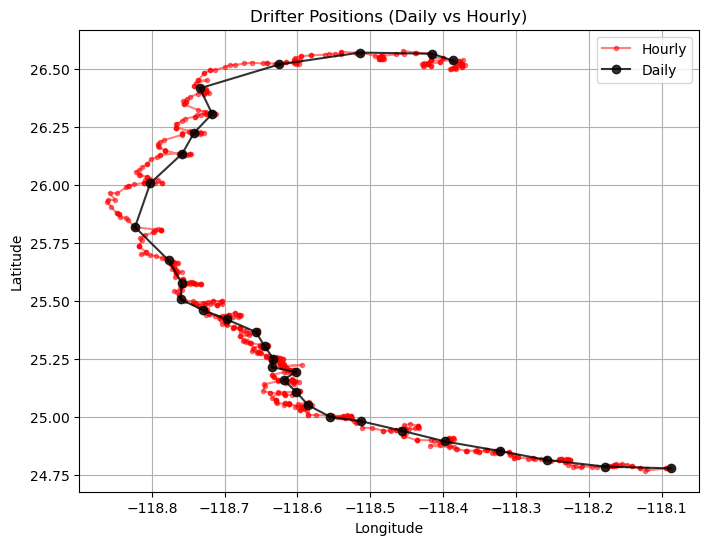

In [19]:
plot_drifter_positions(drifter_daily, drifter_hourly)

<font color="orange">
Part II:   

What features do you see in the hourly data that you do not see in the daily data?.
</font>
 
Answer: the daily drifter data shows a more smoothed trajectory, while the hourly data reveals more detailed movements and variations in the drifter's path. The hourly data captures short-term fluctuations and changes in direction that are not visible in the daily data, providing a more comprehensive view of the drifter's behavior over time.

## Question 3: 
<font color="orange">
Calculate the x-velocity (u) and y-velocity (v) from the drifter position data using (i) the daily drifter data, and (ii) the hourly drifter data. Calculate velocity in cm/s
</font>

In [20]:
def drifter_to_velocity(df, crs_proj="EPSG:3857"):
    """
    Compute drifter u, v velocities in cm/s from lon/lat by projecting into meters.
    """
    # Step 1: Create GeoDataFrame in WGS84
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]), crs="EPSG:4326")

    # Step 2: Reproject into projected CRS (meters)
    gdf = gdf.to_crs(crs_proj)
    gdf["x"] = gdf.geometry.x
    gdf["y"] = gdf.geometry.y

    # Step 3: Compute time and distance intervals
    gdf["time"] = pd.to_datetime(gdf["Date  and time"])
    gdf = gdf.sort_values("time").reset_index(drop=True)

    gdf['dx/cm'] = gdf["x"].diff() * 100
    gdf['dy/cm'] = gdf["y"].diff() * 100
    gdf['dt/s'] = gdf["time"].diff().dt.total_seconds()

    # Step 4: velocities (m/s → cm/s)
    gdf["u_cm/s"] = (gdf['dx/cm'] / gdf['dt/s'])
    gdf["v_cm/s"] = (gdf['dy/cm'] / gdf['dt/s'])

    return gdf

In [21]:
drifter_daily = drifter_to_velocity(drifter_daily)
drifter_daily

,Drifter ID,Date and time,Longitude,Latitude,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,geometry,x,y,time,dx/cm,dy/cm,dt/s,u_cm/s,v_cm/s
0,46926,2014-08-01 00:00:00,-118.087,24.777,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13145384.709 2848378.856),-1.314538e+07,2.848379e+06,2014-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,46926,2014-08-02 00:00:00,-118.178,24.785,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13155514.783 2849359.734),-1.315551e+07,2.849360e+06,2014-08-02 00:00:00,-1.013007e+06,9.808786e+04,86400.0,-11.724622,1.135276
2,46926,2014-08-03 00:00:00,-118.257,24.813,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13164309.023 2852793.308),-1.316431e+07,2.852793e+06,2014-08-03 00:00:00,-8.794240e+05,3.433573e+05,86400.0,-10.178518,3.974043
3,46926,2014-08-04 00:00:00,-118.322,24.852,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13171544.790 2857577.078),-1.317154e+07,2.857577e+06,2014-08-04 00:00:00,-7.235767e+05,4.783771e+05,86400.0,-8.374730,5.536771
4,46926,2014-08-05 00:00:00,-118.397,24.893,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13179893.751 2862607.797),-1.317989e+07,2.862608e+06,2014-08-05 00:00:00,-8.348962e+05,5.030719e+05,86400.0,-9.663150,5.822591
5,46926,2014-08-06 00:00:00,-118.456,24.939,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13186461.601 2868254.007),-1.318646e+07,2.868254e+06,2014-08-06 00:00:00,-6.567850e+05,5.646210e+05,86400.0,-7.601678,6.534965
6,46926,2014-08-07 00:00:00,-118.512,24.980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13192695.493 2873288.275),-1.319270e+07,2.873288e+06,2014-08-07 00:00:00,-6.233891e+05,5.034268e+05,86400.0,-7.215152,5.826699
7,46926,2014-08-08 00:00:00,-118.555,24.999,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13197482.231 2875621.797),-1.319748e+07,2.875622e+06,2014-08-08 00:00:00,-4.786738e+05,2.333523e+05,86400.0,-5.540206,2.700836
8,46926,2014-08-09 00:00:00,-118.585,25.049,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13200821.816 2881764.371),-1.320082e+07,2.881764e+06,2014-08-09 00:00:00,-3.339585e+05,6.142574e+05,86400.0,-3.865260,7.109461
9,46926,2014-08-10 00:00:00,-118.602,25.108,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-13202714.247 2889015.832),-1.320271e+07,2.889016e+06,2014-08-10 00:00:00,-1.892431e+05,7.251461e+05,86400.0,-2.190314,8.392894


In [22]:
drifter_hourly = drifter_to_velocity(drifter_hourly)
drifter_hourly

/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_62564/946472268.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdf["time"] = pd.to_datetime(gdf["Date  and time"])


,Drifter ID,Date and time,Longitude,Latitude,Date and timee,geometry,x,y,time,dx/cm,dy/cm,dt/s,u_cm/s,v_cm/s
0,46926,"Aug 1, 2014 12:00 AM",-118.087,24.777,2014-08-01 00:00:00,POINT (-13145384.709 2848378.856),-1.314538e+07,2.848379e+06,2014-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,46926,"Aug 1, 2014 1:00 AM",-118.094,24.777,2014-08-01 01:00:00,POINT (-13146163.946 2848378.856),-1.314616e+07,2.848379e+06,2014-08-01 01:00:00,-77923.643555,0.000000,3600.0,-21.645457,0.000000
2,46926,"Aug 1, 2014 2:00 AM",-118.094,24.777,2014-08-01 02:00:00,POINT (-13146163.946 2848378.856),-1.314616e+07,2.848379e+06,2014-08-01 02:00:00,0.000000,0.000000,3600.0,0.000000,0.000000
3,46926,"Aug 1, 2014 4:00 AM",-118.122,24.767,2014-08-01 04:00:00,POINT (-13149280.891 2847152.846),-1.314928e+07,2.847153e+06,2014-08-01 04:00:00,-311694.574221,-122600.941105,7200.0,-43.290913,-17.027908
4,46926,"Aug 1, 2014 5:00 AM",-118.120,24.776,2014-08-01 05:00:00,POINT (-13149058.253 2848256.250),-1.314906e+07,2.848256e+06,2014-08-01 05:00:00,22263.898159,110340.402609,3600.0,6.184416,30.650112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,46926,"Aug 31, 2014 7:00 PM",-118.374,26.521,2014-08-31 19:00:00,POINT (-13177333.403 3063753.435),-1.317733e+07,3.063753e+06,2014-08-31 19:00:00,22263.898159,49763.607201,3600.0,6.184416,13.823224
697,46926,"Aug 31, 2014 8:00 PM",-118.374,26.521,2014-08-31 20:00:00,POINT (-13177333.403 3063753.435),-1.317733e+07,3.063753e+06,2014-08-31 20:00:00,0.000000,0.000000,3600.0,0.000000,0.000000
698,46926,"Aug 31, 2014 9:00 PM",-118.378,26.531,2014-08-31 21:00:00,POINT (-13177778.681 3064997.601),-1.317778e+07,3.064998e+06,2014-08-31 21:00:00,-44527.796317,124416.604042,3600.0,-12.368832,34.560168
699,46926,"Aug 31, 2014 10:00 PM",-118.378,26.531,2014-08-31 22:00:00,POINT (-13177778.681 3064997.601),-1.317778e+07,3.064998e+06,2014-08-31 22:00:00,0.000000,0.000000,3600.0,0.000000,0.000000


## Question 4: 
<font color="orange">
Use subplot to split a figure into an upper and lower plot window. In the upper plot window, plot the latitude (y-coordinate) of the drifter as a function of time (in hours) for (i) the daily drifter data, and (ii) the hourly drifter data. As before, use different markers/plots for the different datasets. In the lower window, plot the y-component of the drifter velocity (v) as a function of time (in hours) using (i) the daily drifter data and (ii) the hourly data.
</font>

In [25]:
def plot_lat_and_v(drifter_daily, drifter_hourly):
    """
    Plot #2: Compare latitude and y-velocity (v) for daily vs hourly drifter data.

    Parameters
    ----------
    drifter_daily : pd.DataFrame
    drifter_hourly : pd.DataFrame
    """
    # Step 1: Convert time intervals to hours
    drifter_daily['hrs'] = drifter_daily['dt/s'].cumsum() / 3600.0
    drifter_hourly['hrs'] = drifter_hourly['dt/s'].cumsum() / 3600.0

    # Step 2: Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # --- Upper plot: Latitude vs Time ---
    ax1.plot(drifter_hourly['hrs'], drifter_hourly['Latitude'], '.-', color='red', alpha=0.5, label='Hourly')
    ax1.plot(drifter_daily['hrs'], drifter_daily['Latitude'], 'o-', color='black', alpha=0.8, label='Daily')
    ax1.set_xlabel("Time (hours)")
    ax1.set_ylabel("Latitude Change")
    ax1.set_title("The Change of Drifter Latitude by Hours (Daily vs Hourly)")
    ax1.legend()
    ax1.grid(True)

    # --- Lower plot: v vs Time ---
    ax2.plot(drifter_hourly['hrs'], drifter_hourly['v_cm/s'], '.-', color='red', alpha=0.5, label='Hourly')
    ax2.plot(drifter_daily['hrs'], drifter_daily['v_cm/s'], 'o-', color='black', alpha=0.8, label='Daily')
    ax2.set_xlabel("Time (hours)")
    ax2.set_ylabel("Velocity Change (cm/s)")
    ax2.set_title("The Change of Drifter Velocity by Hours (Daily vs Hourly)")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


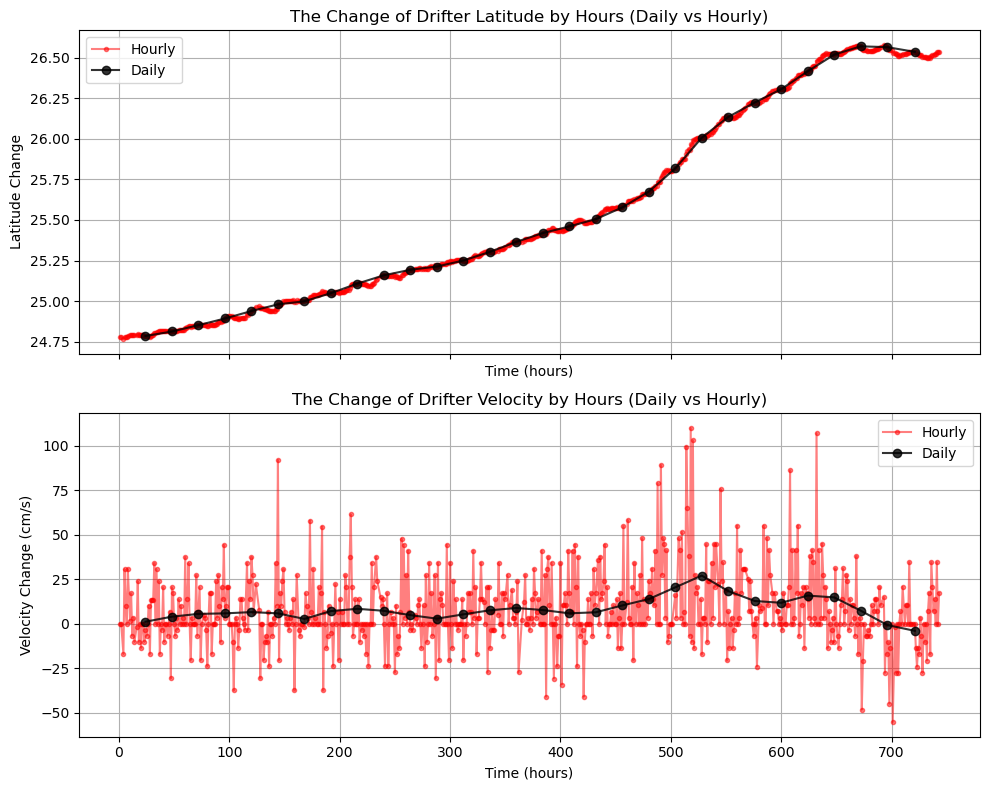

In [26]:
plot_lat_and_v(drifter_daily, drifter_hourly)

## Question 5: 
<font color="orange">
Use subplot to split a figure into an upper and lower plot window. In the upper plot window, plot the longitude (x-coordinate) of the drifter as a function of time (in hours) for (i) the daily drifter data, and (ii) the hourly drifter data. As before, use different markers/plots for the different datasets. In the lower window, plot the x-component of the drifter velocity (u) as a function of time (in hours) using (i) the daily drifter data and (ii) the hourly data.
</font>